In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# makes printing more human-friendly
np.set_printoptions(precision=3, suppress=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
with open('/content/drive/MyDrive/Colab Notebooks/data/Xray.csv', 'r') as f:
  xray_data = np.genfromtxt(f,delimiter=',')

X = xray_data[:, :-1]
y = xray_data[:, -1]

# Perform stratified data split (70/15/15)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

# Evaluate the model on validation data
val_predictions = xgb_classifier.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)
print(f"Validation Accuracy: {val_accuracy}")

# Test the model on test data
test_predictions = xgb_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Validation Accuracy: 0.975
Test Accuracy: 0.95


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


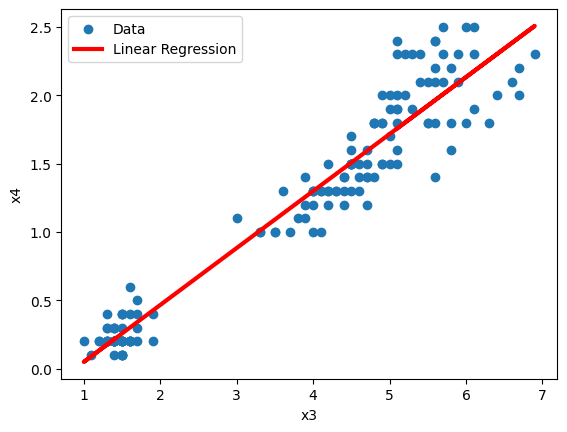

In [ ]:
drive.mount('/content/drive')
with open('/content/drive/MyDrive/Colab Notebooks/data/iris.csv', 'r') as f:
  iris_data = np.genfromtxt(f,delimiter=',')

x3 = iris_data[:, 2].reshape(-1, 1)
x4 = iris_data[:, 3]

# Create a Linear Regression model
model = LinearRegression()
model.fit(x3, x4)

# Plot the linear regression model
plt.scatter(x3, x4, label='Data')
plt.plot(x3, model.predict(x3), color='red', linewidth=3, label='Linear Regression')
plt.xlabel('x3')
plt.ylabel('x4')
plt.legend()
plt.show()

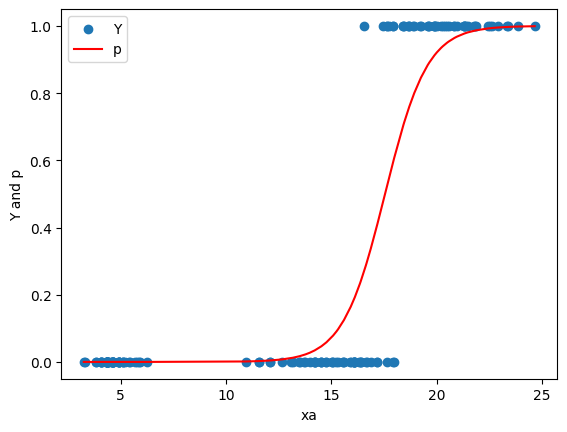

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

features = iris_data[:, 2:4]

Y = (iris_data[:, 4] == 3).astype(int)

# Create a Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(features, Y)

# Calculate the intercept and coefficients
intercept = logreg_model.intercept_
coefficients = logreg_model.coef_

# Calculate xa as w1 * x3 + w2 * x4
xa = coefficients[0][0] * features[:, 0] + coefficients[0][1] * features[:, 1]

# Sort xa, Y, and predicted probabilities p accordingly
sorted_indices = xa.argsort()
xa_sorted = xa[sorted_indices]
Y_sorted = Y[sorted_indices]
p_sorted = logreg_model.predict_proba(features)[:, 1][sorted_indices]

# Plot xa vs Y (scatter plot) and xa vs p (line plot) in the same figure
plt.scatter(xa_sorted, Y_sorted, label='Y', marker='o')
plt.plot(xa_sorted, p_sorted, label='p', linestyle='-', color='red')
plt.xlabel('xa')
plt.ylabel('Y and p')
plt.legend()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Best Polynomial Order (P*): 15
R^2 Score on Test Data: 0.9126343110473107


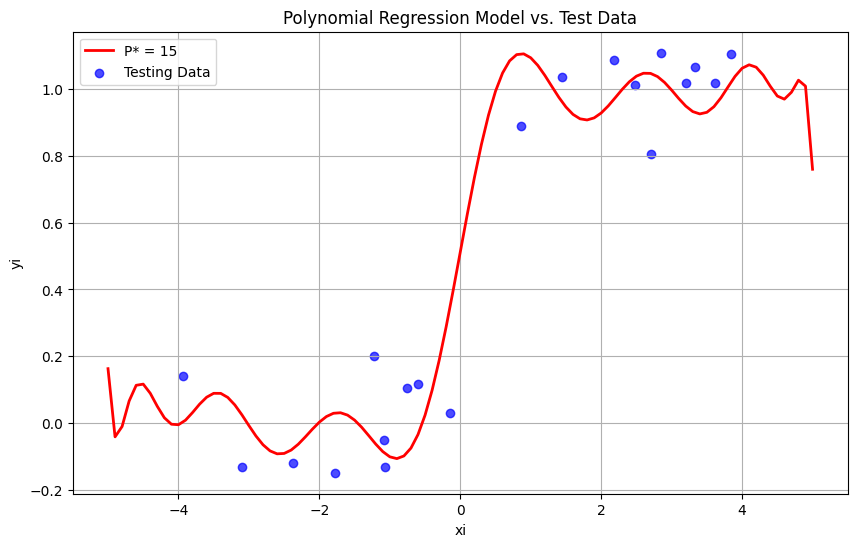

In [ ]:
drive.mount('/content/drive')
with open('/content/drive/MyDrive/Colab Notebooks/data/re_dat.csv', 'r') as f:
  re_dat_data = np.genfromtxt(f,delimiter=',')


# Separate independent variable (xi) and dependent variable (yi)
xi = re_dat_data[:, 0]
yi = re_dat_data[:, 1]

# Partition the dataset into 90% training and 10% testing
X_train, X_test, y_train, y_test = train_test_split(xi, yi, test_size=0.1, random_state=42)

poly_orders = range(2, 16)
best_poly_order = None
best_score = -float('inf')

# Perform 5-fold cross-validation for each polynomial order
for order in poly_orders:
    model = make_pipeline(PolynomialFeatures(degree=order), LinearRegression())

    # Perform cross-validation and calculate the mean R^2 score
    scores = cross_val_score(model, X_train.reshape(-1, 1), y_train, cv=5, scoring='r2')
    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_score = mean_score
        best_poly_order = order

print(f"Best Polynomial Order (P*): {best_poly_order}")

best_model = make_pipeline(PolynomialFeatures(degree=best_poly_order), LinearRegression())

best_model.fit(X_train.reshape(-1, 1), y_train)

y_pred = best_model.predict(X_test.reshape(-1, 1))

r2 = r2_score(y_test, y_pred)
print(f"R^2 Score on Test Data: {r2}")

xi_grid = np.arange(-5, 5.1, 0.1)

yi_pred_grid = best_model.predict(xi_grid.reshape(-1, 1))

# Plot the trained polynomial model and test data
plt.figure(figsize=(10, 6))
plt.plot(xi_grid, yi_pred_grid, label=f'P* = {best_poly_order}', color='red', linewidth=2)
plt.scatter(X_test, y_test, label='Testing Data', marker='o', color='blue', alpha=0.7)
plt.xlabel('xi')
plt.ylabel('yi')
plt.legend()
plt.grid(True)
plt.title('Polynomial Regression Model vs. Test Data')
plt.show()